# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [81]:

# Import Dependencies
import json
import seaborn as sns
import requests as req
import matplotlib.pyplot as plt
import pandas as pd
import random
from citipy import citipy
import pprint


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [82]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [83]:
list_of_lat_lngs = list(zip(lats, lngs)) 
list_of_lat_lngs

[(-4.0682575918652475, -124.85673139834826),
 (12.832041680301487, 119.053274641396),
 (81.71758223708792, -164.73954370779305),
 (10.769064668890792, 32.45997181429709),
 (55.93748512289923, 131.2389827441727),
 (58.432157334340246, 91.22845315321564),
 (-67.82138967708129, 136.26665415989413),
 (-86.85969581935214, -4.064625744632082),
 (2.1682578227477194, -40.3428922808219),
 (16.23098265932532, 70.19140956665007),
 (-62.48244655673195, -10.662930235188213),
 (54.603463814339705, -38.82789054000315),
 (35.14578692458291, -31.958150547704207),
 (39.260018733173496, 160.28851900879812),
 (28.807299747159192, -86.43804063966968),
 (75.15936443732085, -148.71394907646948),
 (-1.6549810285290931, 119.09834942003988),
 (-69.93848627497707, 93.61880153403246),
 (44.631132012020544, -155.4244685974248),
 (89.17483330678616, 25.414577418623054),
 (5.233474922588172, 65.04263506985592),
 (-70.12071504111753, 113.47224204224148),
 (29.499202509526157, -53.2772022164132),
 (-31.82408997256539,

In [84]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
     # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
cities

['atuona',
 'buluang',
 'barrow',
 'abu jubayhah',
 'chagda',
 'yeniseysk',
 'new norfolk',
 'hermanus',
 'acarau',
 'ratnagiri',
 'cape town',
 'nanortalik',
 'ribeira grande',
 'severo-kurilsk',
 'panama city',
 'palu',
 'busselton',
 'kodiak',
 'longyearbyen',
 'ugoofaaru',
 'albany',
 'saint george',
 'kwinana',
 'chokurdakh',
 'thompson',
 'prince rupert',
 'wulanhaote',
 'luwuk',
 'ushuaia',
 'taolanaro',
 'bilma',
 'jericho',
 'kapaa',
 'punta arenas',
 'thakurgaon',
 'hithadhoo',
 'kiama',
 'vaini',
 'sao luiz gonzaga',
 'santa cruz',
 'yellowknife',
 'upernavik',
 'luderitz',
 'annau',
 'maimon',
 'cidreira',
 'vardo',
 'hilo',
 'pisco',
 'pacific grove',
 'khatanga',
 'amqui',
 'qaanaaq',
 'touros',
 'makakilo city',
 'fortuna',
 'rio gallegos',
 'cumaribo',
 'oktyabrskoye',
 'bredasdorp',
 'rikitea',
 'dillon',
 'mar del plata',
 'cockburn town',
 'bluff',
 'nizhneyansk',
 'illoqqortoormiut',
 'saint-joseph',
 'mahebourg',
 'cherskiy',
 'port macquarie',
 'ancud',
 'tasiilaq

In [85]:

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
open_weather = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591'
city_weather = []
for i, city in enumerate(cities):
    weather = req.get(open_weather + "&q=" + city).json()
    print('processing: ', i, city)
    pprint.pprint(weather)
    try:
        city_weather.append({
            'name': weather['name'],
            'lat': weather['coord']['lat'],
            'max_temp': weather['main']['temp_max'],
            'humidity': weather['main']['humidity'],
            'cloudiness': weather['clouds']['all'],
            'wind_speed': weather['wind']['speed']
        })
    except KeyError:
        print(city, ' not found')

processing:  0 atuona
{'base': 'stations',
 'clouds': {'all': 3},
 'cod': 200,
 'coord': {'lat': -9.8, 'lon': -139.03},
 'dt': 1556951932,
 'id': 4020109,
 'main': {'grnd_level': 1010.85,
          'humidity': 80,
          'pressure': 1010.87,
          'sea_level': 1010.87,
          'temp': 83.47,
          'temp_max': 83.47,
          'temp_min': 83.47},
 'name': 'Atuona',
 'sys': {'country': 'PF',
         'message': 0.0072,
         'sunrise': 1556896834,
         'sunset': 1556939118},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 92.542, 'speed': 18.72}}
processing:  1 buluang
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 10.47, 'lon': 123.98},
 'dt': 1556949600,
 'id': 1717512,
 'main': {'humidity': 62,
          'pressure': 1009,
          'temp': 89.6,
          'temp_max': 89.6,
          'temp_min': 89.6},
 'name': 'Buluang',
 'sys': {'country':

processing:  15 palu
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': -0.9, 'lon': 119.87},
 'dt': 1556951937,
 'id': 1633034,
 'main': {'grnd_level': 1000.45,
          'humidity': 58,
          'pressure': 1010.17,
          'sea_level': 1010.17,
          'temp': 88.15,
          'temp_max': 88.15,
          'temp_min': 88.15},
 'name': 'Palu',
 'sys': {'country': 'ID',
         'message': 0.0056,
         'sunrise': 1556920492,
         'sunset': 1556963984},
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 267.965, 'speed': 6.35}}
processing:  16 busselton
{'base': 'stations',
 'clouds': {'all': 45},
 'cod': 200,
 'coord': {'lat': -33.64, 'lon': 115.35},
 'dt': 1556951677,
 'id': 2075265,
 'main': {'humidity': 40,
          'pressure': 1008,
          'temp': 70.25,
          'temp_max': 72,
          'temp_min': 66.99},
 'name': 'Busselton',
 'rain': {'3h'

processing:  28 ushuaia
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -54.81, 'lon': -68.31},
 'dt': 1556949600,
 'id': 3833367,
 'main': {'humidity': 80,
          'pressure': 1006,
          'temp': 33.8,
          'temp_max': 33.8,
          'temp_min': 33.8},
 'name': 'Ushuaia',
 'sys': {'country': 'AR',
         'id': 8303,
         'message': 0.0054,
         'sunrise': 1556971142,
         'sunset': 1557003656,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 340, 'speed': 9.17}}
processing:  29 taolanaro
{'cod': '404', 'message': 'city not found'}
taolanaro  not found
processing:  30 bilma
{'base': 'stations',
 'clouds': {'all': 5},
 'cod': 200,
 'coord': {'lat': 18.69, 'lon': 12.92},
 'dt': 1556951942,
 'id': 2446796,
 'main': {'grnd_level': 945.23,
          'humidity': 9,
          'pressure': 1008.3,
       

processing:  42 luderitz
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -26.65, 'lon': 15.16},
 'dt': 1556946000,
 'id': 3355672,
 'main': {'humidity': 87,
          'pressure': 1013,
          'temp': 55.4,
          'temp_max': 55.4,
          'temp_min': 55.4},
 'name': 'Luderitz',
 'sys': {'country': 'NA',
         'id': 2260,
         'message': 0.0046,
         'sunrise': 1556947502,
         'sunset': 1556987232,
         'type': 1},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 150, 'speed': 2.24}}
processing:  43 annau
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 37.89, 'lon': 58.52},
 'dt': 1556949600,
 'id': 162199,
 'main': {'humidity': 44,
          'pressure': 1013,
          'temp': 78.8,
          'temp_max': 78.8,
          'temp_min': 78.8},
 'name': 'Annau',
 'sys': {'country': 'TM',
         'id': 8992,
      

processing:  55 fortuna
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 38.18, 'lon': -1.13},
 'dt': 1556951915,
 'id': 2517679,
 'main': {'humidity': 93,
          'pressure': 1013,
          'temp': 56.19,
          'temp_max': 60.01,
          'temp_min': 48.99},
 'name': 'Fortuna',
 'sys': {'country': 'ES',
         'id': 6425,
         'message': 0.0065,
         'sunrise': 1556946302,
         'sunset': 1556996251,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'speed': 1.12}}
processing:  56 rio gallegos
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -51.62, 'lon': -69.22},
 'dt': 1556949600,
 'id': 3838859,
 'main': {'humidity': 76,
          'pressure': 1008,
          'temp': 32,
          'temp_max': 32,
          'temp_min': 32},
 'name': 'Rio Gallegos',
 'sys': {'country': 'AR',
       

processing:  70 port macquarie
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -31.43, 'lon': 152.91},
 'dt': 1556951705,
 'id': 2152659,
 'main': {'humidity': 68,
          'pressure': 1013,
          'temp': 62.67,
          'temp_max': 64.4,
          'temp_min': 61},
 'name': 'Port Macquarie',
 'sys': {'country': 'AU',
         'id': 9610,
         'message': 0.0051,
         'sunrise': 1556914847,
         'sunset': 1556953771,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 270, 'speed': 6.93}}
processing:  71 ancud
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': -41.87, 'lon': -73.83},
 'dt': 1556949600,
 'id': 3899695,
 'main': {'humidity': 100,
          'pressure': 1004,
          'temp': 51.8,
          'temp_max': 51.8,
          'temp_min': 51.8},
 'name': 'Ancud',
 'sys': {

processing:  84 ponta do sol
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -20.63, 'lon': -46},
 'dt': 1556951961,
 'id': 3453439,
 'main': {'grnd_level': 905.86,
          'humidity': 97,
          'pressure': 1017.38,
          'sea_level': 1017.38,
          'temp': 63.85,
          'temp_max': 63.85,
          'temp_min': 63.85},
 'name': 'Ponta do Sol',
 'rain': {'3h': 5.312},
 'sys': {'country': 'BR',
         'message': 0.0055,
         'sunrise': 1556961702,
         'sunset': 1557002388},
 'weather': [{'description': 'moderate rain',
              'icon': '10n',
              'id': 501,
              'main': 'Rain'}],
 'wind': {'deg': 58.728, 'speed': 2.93}}
processing:  85 huejucar
{'base': 'stations',
 'clouds': {'all': 99},
 'cod': 200,
 'coord': {'lat': 22.35, 'lon': -103.22},
 'dt': 1556951961,
 'id': 4004618,
 'main': {'grnd_level': 793.31,
          'humidity': 31,
          'pressure': 1013.52,
          'sea_level': 1013.52,
          't

processing:  98 lompoc
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 34.64, 'lon': -120.46},
 'dt': 1556951907,
 'id': 5367788,
 'main': {'humidity': 87,
          'pressure': 1015,
          'temp': 53.44,
          'temp_max': 57.2,
          'temp_min': 50},
 'name': 'Lompoc',
 'sys': {'country': 'US',
         'id': 4747,
         'message': 0.0066,
         'sunrise': 1556888977,
         'sunset': 1556938062,
         'type': 1},
 'visibility': 14484,
 'weather': [{'description': 'mist', 'icon': '50n', 'id': 701, 'main': 'Mist'}],
 'wind': {'deg': 300, 'speed': 3.36}}
processing:  99 wolfenbuttel
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 52.17, 'lon': 10.55},
 'dt': 1556951782,
 'id': 2806914,
 'main': {'humidity': 86,
          'pressure': 1006,
          'temp': 39.09,
          'temp_max': 43,
          'temp_min': 35.01},
 'name': 'Wolfenbuttel',
 'sys': {'country': 'DE',
         'id': 1276,
         'message': 0

processing:  112 faanui
{'base': 'stations',
 'clouds': {'all': 63},
 'cod': 200,
 'coord': {'lat': -16.48, 'lon': -151.75},
 'dt': 1556951973,
 'id': 4034551,
 'main': {'grnd_level': 1012.77,
          'humidity': 77,
          'pressure': 1012.7,
          'sea_level': 1012.7,
          'temp': 81.67,
          'temp_max': 81.67,
          'temp_min': 81.67},
 'name': 'Faanui',
 'rain': {'3h': 0.25},
 'sys': {'country': 'PF',
         'message': 0.0045,
         'sunrise': 1556900358,
         'sunset': 1556941699},
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 92.165, 'speed': 21.39}}
processing:  113 srednekolymsk
{'base': 'stations',
 'clouds': {'all': 97},
 'cod': 200,
 'coord': {'lat': 67.46, 'lon': 153.71},
 'dt': 1556951973,
 'id': 2121025,
 'main': {'grnd_level': 1012.59,
          'humidity': 91,
          'pressure': 1016.05,
          'sea_level': 1016.05,
          'temp': 

processing:  125 tole
{'base': 'stations',
 'clouds': {'all': 98},
 'cod': 200,
 'coord': {'lat': 4.11, 'lon': 9.25},
 'dt': 1556951977,
 'id': 2229411,
 'main': {'grnd_level': 1003.51,
          'humidity': 72,
          'pressure': 1011.39,
          'sea_level': 1011.39,
          'temp': 82.93,
          'temp_max': 82.93,
          'temp_min': 82.93},
 'name': 'Tole',
 'sys': {'country': 'CM',
         'message': 0.0047,
         'sunrise': 1556946697,
         'sunset': 1556990874},
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 282.673, 'speed': 3.56}}
processing:  126 bengkulu
{'cod': '404', 'message': 'city not found'}
bengkulu  not found
processing:  127 liliani
{'base': 'stations',
 'clouds': {'all': 4},
 'cod': 200,
 'coord': {'lat': 32.21, 'lon': 72.95},
 'dt': 1556951978,
 'id': 1171991,
 'main': {'grnd_level': 978.23,
          'humidity': 16,
          'pressure': 1

processing:  139 jamestown
{'base': 'stations',
 'clouds': {'all': 17},
 'cod': 200,
 'coord': {'lat': -33.21, 'lon': 138.6},
 'dt': 1556951984,
 'id': 2069194,
 'main': {'grnd_level': 993.95,
          'humidity': 49,
          'pressure': 1023.93,
          'sea_level': 1023.93,
          'temp': 63.85,
          'temp_max': 63.85,
          'temp_min': 63.85},
 'name': 'Jamestown',
 'sys': {'country': 'AU',
         'message': 0.0057,
         'sunrise': 1556918449,
         'sunset': 1556957037},
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 207.926, 'speed': 8.12}}
processing:  140 tecoanapa
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 16.99, 'lon': -99.26},
 'dt': 1556949360,
 'id': 3532499,
 'main': {'humidity': 88,
          'pressure': 1011,
          'temp': 78.8,
          'temp_max': 78.8,
          'temp_min': 78.8},
 'name': 'Tecoanapa',
 's

processing:  153 provideniya
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 64.42, 'lon': -173.23},
 'dt': 1556951989,
 'id': 4031574,
 'main': {'grnd_level': 966.64,
          'humidity': 98,
          'pressure': 1007.21,
          'sea_level': 1007.21,
          'temp': 29.47,
          'temp_max': 29.47,
          'temp_min': 29.47},
 'name': 'Provideniya',
 'sys': {'country': 'RU',
         'message': 0.0058,
         'sunrise': 1556981520,
         'sunset': 1557043637},
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 157.531, 'speed': 3.85}}
processing:  154 hamilton
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 43.26, 'lon': -79.87},
 'dt': 1556951761,
 'id': 5969785,
 'main': {'humidity': 100,
          'pressure': 1015,
          'temp': 46.69,
          'temp_max': 50,
          'temp_min': 44.01},
 'name': 'Hami

processing:  168 inta
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 66.04, 'lon': 60.13},
 'dt': 1556951995,
 'id': 1505579,
 'main': {'grnd_level': 990.63,
          'humidity': 98,
          'pressure': 998.04,
          'sea_level': 998.04,
          'temp': 43.15,
          'temp_max': 43.15,
          'temp_min': 43.15},
 'name': 'Inta',
 'sys': {'country': 'RU',
         'message': 0.0053,
         'sunrise': 1556924779,
         'sunset': 1556988371},
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 202.886, 'speed': 10.71}}
processing:  169 chernyshevskiy
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 63.01, 'lon': 112.47},
 'dt': 1556951995,
 'id': 2025456,
 'main': {'grnd_level': 978.21,
          'humidity': 96,
          'pressure': 1018.62,
          'sea_level': 1018.62,
          'temp': 37.03,
          'tem

processing:  182 kruisfontein
{'base': 'stations',
 'clouds': {'all': 76},
 'cod': 200,
 'coord': {'lat': -34, 'lon': 24.73},
 'dt': 1556951999,
 'id': 986717,
 'main': {'grnd_level': 991.84,
          'humidity': 83,
          'pressure': 1023.25,
          'sea_level': 1023.25,
          'temp': 54.67,
          'temp_max': 54.67,
          'temp_min': 54.67},
 'name': 'Kruisfontein',
 'sys': {'country': 'ZA',
         'message': 0.004,
         'sunrise': 1556945869,
         'sunset': 1556984272},
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 286.09, 'speed': 7.18}}
processing:  183 quatre cocos
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': -20.21, 'lon': 57.76},
 'dt': 1556951941,
 'id': 1106643,
 'main': {'humidity': 65,
          'pressure': 1021,
          'temp': 80.8,
          'temp_max': 81,
          'temp_min': 80.6},
 'name': 'Quatre Coco

processing:  197 paita
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -5.09, 'lon': -81.11},
 'dt': 1556952003,
 'id': 3694112,
 'main': {'grnd_level': 1012.05,
          'humidity': 90,
          'pressure': 1011.8,
          'sea_level': 1011.8,
          'temp': 70.15,
          'temp_max': 70.15,
          'temp_min': 70.15},
 'name': 'Paita',
 'sys': {'country': 'PE',
         'message': 0.0044,
         'sunrise': 1556969013,
         'sunset': 1557011929},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 155.935, 'speed': 12.5}}
processing:  198 uray
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 60.13, 'lon': 64.8},
 'dt': 1556952004,
 'id': 1488429,
 'main': {'grnd_level': 1001.44,
          'humidity': 83,
          'pressure': 1008.6,
          'sea_level': 1008.6,
          'temp': 53.59,
          'temp_max': 53.59,
    

processing:  210 esperance
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 10.24, 'lon': -61.45},
 'dt': 1556951707,
 'id': 3573739,
 'main': {'humidity': 88,
          'pressure': 1012,
          'temp': 75.99,
          'temp_max': 77,
          'temp_min': 75},
 'name': 'Esperance',
 'sys': {'country': 'TT',
         'id': 8810,
         'message': 0.0045,
         'sunrise': 1556963232,
         'sunset': 1557008273,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 120, 'speed': 5.82}}
processing:  211 kalemie
{'base': 'stations',
 'clouds': {'all': 71},
 'cod': 200,
 'coord': {'lat': -5.95, 'lon': 29.2},
 'dt': 1556952008,
 'id': 214974,
 'main': {'grnd_level': 890.55,
          'humidity': 88,
          'pressure': 1013.52,
          'sea_level': 1013.52,
          'temp': 71.05,
          'temp_max': 71.05,
    

 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 94.77, 'speed': 6.76}}
processing:  224 salisbury
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 51.07, 'lon': -1.8},
 'dt': 1556951952,
 'id': 2638664,
 'main': {'humidity': 86,
          'pressure': 1017,
          'temp': 40.23,
          'temp_max': 42.01,
          'temp_min': 39},
 'name': 'Salisbury',
 'rain': {'3h': 0.313},
 'sys': {'country': 'GB',
         'id': 1500,
         'message': 0.0063,
         'sunrise': 1556944532,
         'sunset': 1556998342,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 340, 'speed': 11.41}}
processing:  225 katsiveli
{'cod': '404', 'message': 'city not found'}
katsiveli  not found
processing:  226 grand gaube
{'base': 'stations

processing:  240 butaritari
{'base': 'stations',
 'clouds': {'all': 91},
 'cod': 200,
 'coord': {'lat': 3.07, 'lon': 172.79},
 'dt': 1556952017,
 'id': 2110227,
 'main': {'grnd_level': 1006.98,
          'humidity': 77,
          'pressure': 1006.83,
          'sea_level': 1006.83,
          'temp': 83.65,
          'temp_max': 83.65,
          'temp_min': 83.65},
 'name': 'Butaritari',
 'rain': {'3h': 0.124},
 'sys': {'country': 'KI',
         'message': 0.0051,
         'sunrise': 1556907523,
         'sunset': 1556951553},
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 78.059, 'speed': 17.4}}
processing:  241 vryburg
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -26.96, 'lon': 24.73},
 'dt': 1556952018,
 'id': 942511,
 'main': {'grnd_level': 877.68,
          'humidity': 38,
          'pressure': 1018.63,
          'sea_level': 1018.63,
          'temp': 63

processing:  253 inhambane
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -23.87, 'lon': 35.38},
 'dt': 1556952021,
 'id': 1045114,
 'main': {'grnd_level': 1006.48,
          'humidity': 74,
          'pressure': 1017.8,
          'sea_level': 1017.8,
          'temp': 73.03,
          'temp_max': 73.03,
          'temp_min': 73.03},
 'name': 'Inhambane',
 'sys': {'country': 'MZ',
         'message': 0.0052,
         'sunrise': 1556942419,
         'sunset': 1556982610},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 353.501, 'speed': 6.17}}
processing:  254 saleaula
{'cod': '404', 'message': 'city not found'}
saleaula  not found
processing:  255 rio grande
{'base': 'stations',
 'clouds': {'all': 58},
 'cod': 200,
 'coord': {'lat': -32.03, 'lon': -52.1},
 'dt': 1556952022,
 'id': 3451138,
 'main': {'grnd_level': 1012.66,
          'humidity': 97,
          'pre

processing:  268 intipuca
{'base': 'stations',
 'clouds': {'all': 88},
 'cod': 200,
 'coord': {'lat': 13.2, 'lon': -88.05},
 'dt': 1556952026,
 'id': 3585480,
 'main': {'grnd_level': 1010.29,
          'humidity': 75,
          'pressure': 1011.16,
          'sea_level': 1011.16,
          'temp': 83.83,
          'temp_max': 83.83,
          'temp_min': 83.83},
 'name': 'Intipuca',
 'sys': {'country': 'SV',
         'message': 0.0052,
         'sunrise': 1556969400,
         'sunset': 1557014872},
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 311.183, 'speed': 7.92}}
processing:  269 hay river
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 60.82, 'lon': -115.79},
 'dt': 1556949600,
 'id': 5972762,
 'main': {'humidity': 85,
          'pressure': 1024,
          'temp': 23,
          'temp_max': 23,
          'temp_min': 23},
 'name': 'Hay River',
 'sys

processing:  281 tuatapere
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -46.13, 'lon': 167.69},
 'dt': 1556952007,
 'id': 2180815,
 'main': {'humidity': 62,
          'pressure': 1012,
          'temp': 64,
          'temp_max': 64,
          'temp_min': 64},
 'name': 'Tuatapere',
 'rain': {},
 'sys': {'country': 'NZ',
         'id': 2008959,
         'message': 0.0053,
         'sunrise': 1556912945,
         'sunset': 1556948579,
         'type': 3},
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 347, 'gust': 11.18, 'speed': 10}}
processing:  282 dunedin
{'base': 'stations',
 'clouds': {'all': 99},
 'cod': 200,
 'coord': {'lat': -45.87, 'lon': 170.5},
 'dt': 1556952016,
 'id': 2191562,
 'main': {'humidity': 43,
          'pressure': 1012,
          'temp': 66,
          'temp_max': 66,
          'temp_min': 66},
 'name': 'Dunedin',
 'sys': {'countr

processing:  296 rolla
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 37.95, 'lon': -91.77},
 'dt': 1556951727,
 'id': 4406282,
 'main': {'humidity': 93,
          'pressure': 1015,
          'temp': 54.3,
          'temp_max': 55.99,
          'temp_min': 53.01},
 'name': 'Rolla',
 'sys': {'country': 'US',
         'id': 6176,
         'message': 0.0066,
         'sunrise': 1556968066,
         'sunset': 1557017992,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 50, 'speed': 6.93}}
processing:  297 umzimvubu
{'cod': '404', 'message': 'city not found'}
umzimvubu  not found
processing:  298 kieta
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -6.22, 'lon': 155.63},
 'dt': 1556952035,
 'id': 2094027,
 'main': {'grnd_level': 1010.08,
          'humidity': 58,
          'pressure': 100

processing:  311 payson
{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 40.04, 'lon': -111.73},
 'dt': 1556952026,
 'id': 5779548,
 'main': {'humidity': 66,
          'pressure': 1017,
          'temp': 46.6,
          'temp_max': 51.01,
          'temp_min': 37.99},
 'name': 'Payson',
 'sys': {'country': 'US',
         'id': 5442,
         'message': 0.0071,
         'sunrise': 1556972599,
         'sunset': 1557023039,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 150, 'speed': 5.82}}
processing:  312 boyolangu
{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': -8.09, 'lon': 111.9},
 'dt': 1556952040,
 'id': 1648082,
 'main': {'grnd_level': 966.55,
          'humidity': 58,
          'pressure': 1010.28,
          'sea_level': 1010.28,
          'temp': 86.35,
          'temp_max': 86.35,
    

processing:  324 zyryanka
{'base': 'stations',
 'clouds': {'all': 97},
 'cod': 200,
 'coord': {'lat': 65.73, 'lon': 150.89},
 'dt': 1556952044,
 'id': 2119283,
 'main': {'grnd_level': 1008.87,
          'humidity': 99,
          'pressure': 1015.56,
          'sea_level': 1015.56,
          'temp': 35.23,
          'temp_max': 35.23,
          'temp_min': 35.23},
 'name': 'Zyryanka',
 'sys': {'country': 'RU',
         'message': 0.0043,
         'sunrise': 1556903234,
         'sunset': 1556966354},
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 355.528, 'speed': 4.94}}
processing:  325 vicuna
{'cod': '404', 'message': 'city not found'}
vicuna  not found
processing:  326 coyuca
{'cod': '404', 'message': 'city not found'}
coyuca  not found
processing:  327 alekseyevsk
{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': 57.84, 'lon': 108.35},
 'dt': 1556952044

processing:  340 clyde river
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 70.47, 'lon': -68.59},
 'dt': 1556949600,
 'id': 5924351,
 'main': {'humidity': 100,
          'pressure': 1025,
          'temp': 21.2,
          'temp_max': 21.2,
          'temp_min': 21.2},
 'name': 'Clyde River',
 'sys': {'country': 'CA',
         'id': 776,
         'message': 0.0069,
         'sunrise': 1556951888,
         'sunset': 1557023044,
         'type': 1},
 'visibility': 805,
 'weather': [{'description': 'fog', 'icon': '50n', 'id': 741, 'main': 'Fog'}],
 'wind': {'deg': 350, 'speed': 10.29}}
processing:  341 hihifo
{'cod': '404', 'message': 'city not found'}
hihifo  not found
processing:  342 ketchikan
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 55.34, 'lon': -131.65},
 'dt': 1556949360,
 'id': 5554428,
 'main': {'humidity': 93,
          'pressure': 1021,
          'temp': 48.2,
          'temp_max': 48.2,
          'temp_min': 48.2}

processing:  354 sydney
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -33.85, 'lon': 151.22},
 'dt': 1556951790,
 'id': 2147714,
 'main': {'humidity': 56,
          'pressure': 1014,
          'temp': 67.17,
          'temp_max': 69.8,
          'temp_min': 64.99},
 'name': 'Sydney',
 'sys': {'country': 'AU',
         'id': 9600,
         'message': 0.0075,
         'sunrise': 1556915480,
         'sunset': 1556953949,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 190, 'speed': 17.22}}
processing:  355 alma
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 40.1, 'lon': -99.36},
 'dt': 1556951898,
 'id': 5062898,
 'main': {'humidity': 93,
          'pressure': 1016,
          'temp': 49.12,
          'temp_max': 53.01,
          'temp_min': 46},
 'name': 'Alma',
 'sys': {'country': 'US'

processing:  368 kaihua
{'base': 'stations',
 'clouds': {'all': 99},
 'cod': 200,
 'coord': {'lat': 29.14, 'lon': 118.41},
 'dt': 1556952058,
 'id': 1789001,
 'main': {'grnd_level': 969.36,
          'humidity': 28,
          'pressure': 1013.78,
          'sea_level': 1013.78,
          'temp': 78.79,
          'temp_max': 78.79,
          'temp_min': 78.79},
 'name': 'Kaihua',
 'sys': {'country': 'CN',
         'message': 0.0047,
         'sunrise': 1556918571,
         'sunset': 1556966606},
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 116.351, 'speed': 4.29}}
processing:  369 alofi
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -19.06, 'lon': -169.92},
 'dt': 1556949600,
 'id': 4036284,
 'main': {'humidity': 100,
          'pressure': 1010,
          'temp': 75.2,
          'temp_max': 75.2,
          'temp_min': 75.2},
 'name': 'Alofi',
 'rain':

processing:  381 champerico
{'base': 'stations',
 'clouds': {'all': 7},
 'cod': 200,
 'coord': {'lat': 16.38, 'lon': -93.6},
 'dt': 1556952062,
 'id': 3530097,
 'main': {'grnd_level': 919.62,
          'humidity': 90,
          'pressure': 1010.71,
          'sea_level': 1010.71,
          'temp': 70.15,
          'temp_max': 70.15,
          'temp_min': 70.15},
 'name': 'Champerico',
 'sys': {'country': 'MX',
         'message': 0.0064,
         'sunrise': 1556970494,
         'sunset': 1557016442},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 222.601, 'speed': 3.74}}
processing:  382 laguna
{'base': 'stations',
 'clouds': {'all': 34},
 'cod': 200,
 'coord': {'lat': 27.52, 'lon': -110.01},
 'dt': 1556951839,
 'id': 4013704,
 'main': {'grnd_level': 1009.76,
          'humidity': 22,
          'pressure': 1010.16,
          'sea_level': 1010.16,
          'temp': 74.29,
          'temp_m

processing:  396 saint-augustin
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 44.83, 'lon': -0.61},
 'dt': 1556951949,
 'id': 3031582,
 'main': {'humidity': 93,
          'pressure': 1015,
          'temp': 50,
          'temp_max': 50,
          'temp_min': 50},
 'name': 'Saint-Augustin',
 'sys': {'country': 'FR',
         'id': 6450,
         'message': 0.0053,
         'sunrise': 1556945302,
         'sunset': 1556997001,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 250, 'speed': 3.36}}
processing:  397 miandrivazo
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -19.53, 'lon': 45.46},
 'dt': 1556952068,
 'id': 1059051,
 'main': {'grnd_level': 1002.27,
          'humidity': 53,
          'pressure': 1017.92,
          'sea_level': 1017.92,
          'temp': 82.57,
          'temp_max': 8

processing:  409 nouadhibou
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 20.93, 'lon': -17.03},
 'dt': 1556949600,
 'id': 2377457,
 'main': {'humidity': 82,
          'pressure': 1015,
          'temp': 62.6,
          'temp_max': 62.6,
          'temp_min': 62.6},
 'name': 'Nouadhibou',
 'sys': {'country': 'MR',
         'id': 2444,
         'message': 0.0055,
         'sunrise': 1556951768,
         'sunset': 1556998417,
         'type': 1},
 'visibility': 8000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 20, 'speed': 14.99}}
processing:  410 mezen
{'base': 'stations',
 'clouds': {'all': 46},
 'cod': 200,
 'coord': {'lat': 65.85, 'lon': 44.24},
 'dt': 1556952071,
 'id': 527321,
 'main': {'grnd_level': 982.98,
          'humidity': 84,
          'pressure': 986.55,
          'sea_level': 986.55,
          'temp': 34.51,
          'temp_max': 34.51,
      

processing:  423 jahrom
{'cod': '404', 'message': 'city not found'}
jahrom  not found
processing:  424 urubicha
{'base': 'stations',
 'clouds': {'all': 30},
 'cod': 200,
 'coord': {'lat': -15.63, 'lon': -63.08},
 'dt': 1556952075,
 'id': 3923644,
 'main': {'grnd_level': 986.07,
          'humidity': 87,
          'pressure': 1010.02,
          'sea_level': 1010.02,
          'temp': 75.73,
          'temp_max': 75.73,
          'temp_min': 75.73},
 'name': 'Urubicha',
 'sys': {'country': 'BO',
         'message': 0.005,
         'sunrise': 1556965428,
         'sunset': 1557006860},
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 9.948, 'speed': 3.87}}
processing:  425 berlevag
{'base': 'stations',
 'clouds': {'all': 99},
 'cod': 200,
 'coord': {'lat': 70.86, 'lon': 29.09},
 'dt': 1556952076,
 'id': 780687,
 'main': {'grnd_level': 994.5,
          'humidity': 68,
          'pressur

processing:  437 hambantota
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 6.12, 'lon': 81.12},
 'dt': 1556950200,
 'id': 1244926,
 'main': {'humidity': 70,
          'pressure': 1010,
          'temp': 91.4,
          'temp_max': 91.4,
          'temp_min': 91.4},
 'name': 'Hambantota',
 'sys': {'country': 'LK',
         'id': 9124,
         'message': 0.0051,
         'sunrise': 1556929311,
         'sunset': 1556973764,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 270, 'speed': 14.99}}
processing:  438 borodino
{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 55.9, 'lon': 94.89},
 'dt': 1556952079,
 'id': 1508943,
 'main': {'grnd_level': 994.47,
          'humidity': 22,
          'pressure': 1029.68,
          'sea_level': 1029.68,
          'temp': 56.65,
          'temp_max': 

processing:  450 coruripe
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -10.12, 'lon': -36.18},
 'dt': 1556952083,
 'id': 3465329,
 'main': {'grnd_level': 993.97,
          'humidity': 93,
          'pressure': 1013.85,
          'sea_level': 1013.85,
          'temp': 69.97,
          'temp_max': 69.97,
          'temp_min': 69.97},
 'name': 'Coruripe',
 'sys': {'country': 'BR',
         'message': 0.0044,
         'sunrise': 1556958578,
         'sunset': 1557000799},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 47.426, 'speed': 3.69}}
processing:  451 anadyr
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 64.73, 'lon': 177.51},
 'dt': 1556951588,
 'id': 2127202,
 'main': {'humidity': 86,
          'pressure': 1011,
          'temp': 33.39,
          'temp_max': 33.8,
          'temp_min': 33.01},
 'name': 'Anadyr',
 'sys': {'cou

processing:  464 yulara
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -25.24, 'lon': 130.99},
 'dt': 1556949600,
 'id': 6355222,
 'main': {'humidity': 15,
          'pressure': 1021,
          'temp': 77,
          'temp_max': 77,
          'temp_min': 77},
 'name': 'Yulara',
 'sys': {'country': 'AU',
         'id': 9487,
         'message': 0.0048,
         'sunrise': 1556919576,
         'sunset': 1556959563,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 90, 'speed': 13.87}}
processing:  465 sambava
{'base': 'stations',
 'clouds': {'all': 30},
 'cod': 200,
 'coord': {'lat': -14.27, 'lon': 50.17},
 'dt': 1556952089,
 'id': 1056899,
 'main': {'grnd_level': 986.43,
          'humidity': 76,
          'pressure': 1017.76,
          'sea_level': 1017.76,
          'temp': 77.71,
          'temp_max': 77.71,
          't

 'sys': {'country': 'AU',
         'id': 9483,
         'message': 0.0052,
         'sunrise': 1556918758,
         'sunset': 1556958994,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 90, 'speed': 13.87}}
processing:  478 kununurra
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -15.77, 'lon': 128.74},
 'dt': 1556950740,
 'id': 2068110,
 'main': {'humidity': 49,
          'pressure': 1010,
          'temp': 89.6,
          'temp_max': 89.6,
          'temp_min': 89.6},
 'name': 'Kununurra',
 'sys': {'country': 'AU',
         'id': 9587,
         'message': 0.0043,
         'sunrise': 1556919392,
         'sunset': 1556960827,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 1

processing:  490 kayerkan
{'base': 'stations',
 'clouds': {'all': 13},
 'cod': 200,
 'coord': {'lat': 69.35, 'lon': 87.76},
 'dt': 1556949600,
 'id': 1497337,
 'main': {'humidity': 78,
          'pressure': 1010,
          'temp': 15.8,
          'temp_max': 15.8,
          'temp_min': 15.8},
 'name': 'Kayerkan',
 'sys': {'country': 'RU',
         'id': 8951,
         'message': 0.0044,
         'sunrise': 1556915725,
         'sunset': 1556984164,
         'type': 1},
 'visibility': 9000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 70, 'speed': 8.95}}
processing:  491 lolua
{'cod': '404', 'message': 'city not found'}
lolua  not found
processing:  492 pevek
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 69.7, 'lon': 170.27},
 'dt': 1556952098,
 'id': 2122090,
 'main': {'grnd_level': 1016.53,
          'humidity': 87,
          'pressure': 1015.93,
        

processing:  505 okato
{'base': 'stations',
 'clouds': {'all': 55},
 'cod': 200,
 'coord': {'lat': -39.19, 'lon': 173.88},
 'dt': 1556952004,
 'id': 2185763,
 'main': {'humidity': 69,
          'pressure': 1016,
          'temp': 56.43,
          'temp_max': 59,
          'temp_min': 54},
 'name': 'Okato',
 'sys': {'country': 'NZ',
         'id': 2012470,
         'message': 0.0065,
         'sunrise': 1556910592,
         'sunset': 1556947961,
         'type': 3},
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 327.576, 'speed': 12.68}}
processing:  506 china
{'base': 'stations',
 'clouds': {'all': 93},
 'cod': 200,
 'coord': {'lat': 25.71, 'lon': -99.24},
 'dt': 1556951832,
 'id': 3530839,
 'main': {'grnd_level': 985.75,
          'humidity': 69,
          'pressure': 1009.65,
          'sea_level': 1009.65,
          'temp': 77.17,
          'temp_max': 77.17,
          'temp_min':

processing:  519 lakes entrance
{'base': 'stations',
 'clouds': {'all': 82},
 'cod': 200,
 'coord': {'lat': -37.88, 'lon': 147.99},
 'dt': 1556952065,
 'id': 2160735,
 'main': {'humidity': 93,
          'pressure': 1017,
          'temp': 56.61,
          'temp_max': 59,
          'temp_min': 55},
 'name': 'Lakes Entrance',
 'rain': {},
 'sys': {'country': 'AU',
         'id': 2011895,
         'message': 0.0053,
         'sunrise': 1556916666,
         'sunset': 1556954313,
         'type': 3},
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 244, 'gust': 1.79, 'speed': 1.01}}
processing:  520 byron bay
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': -28.65, 'lon': 153.62},
 'dt': 1556952023,
 'id': 2172880,
 'main': {'humidity': 92,
          'pressure': 1011,
          'temp': 64.78,
          'temp_max': 66.2,
          'temp_min': 63},
 'name': 'Byron B

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
city_weather_df = pd.DataFrame(city_weather)
city_weather_df.to_csv('city_weather.csv')

In [80]:
city_weather_df.head()

,cloudiness,humidity,lat,max_temp,name,wind_speed
0,100,79,-23.12,77.71,Rikitea,11.32
1,75,62,-42.88,59.00,Hobart,20.80
2,100,76,-0.60,84.73,Hithadhoo,6.64
3,40,65,-20.41,80.60,Mahebourg,11.41
4,0,74,-54.81,33.80,Ushuaia,5.82


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

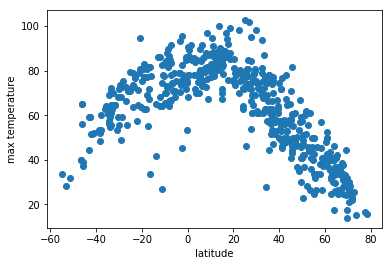

In [64]:
plt.scatter(city_data_pd['lat'], city_data_pd['max_temp'])
plt.xlabel('latitude')
plt.ylabel('max temperature')
plt.show()

#### Latitude vs. Humidity Plot

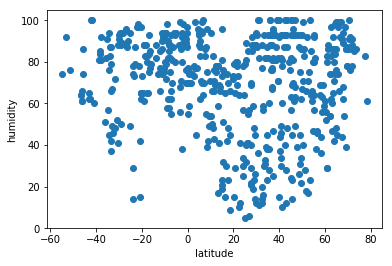

In [65]:
plt.scatter(city_data_pd['lat'], city_data_pd['humidity'])
plt.xlabel('latitude')
plt.ylabel('humidity')
plt.show()

#### Latitude vs. Cloudiness Plot

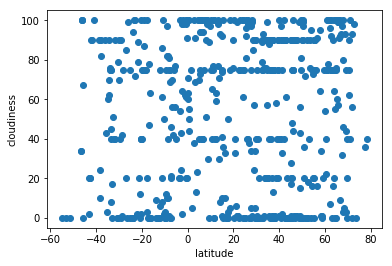

In [66]:
plt.scatter(city_data_pd['lat'], city_data_pd['cloudiness'])
plt.xlabel('latitude')
plt.ylabel('cloudiness')
plt.show()

#### Latitude vs. Wind Speed Plot

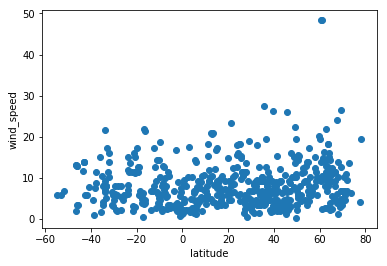

In [60]:
plt.scatter(city_data_pd['lat'], city_data_pd['wind_speed'])
plt.xlabel('latitude')
plt.ylabel('wind_speed')
plt.show()